#  Maximum entropy: Pairwise Ising model for experimental data

Run the pairwise Ising model on experiemntal data i.e., 46 neurons from a macaque. Thanks for the data:
https://crcns.org/data-sets/vc/pvc-5/about by Cheng C. J. Chu, Ping F. Chien, Chou P. Hung (2014): Multi-electrode recordings of ongoing activity and responses to parametric stimuli in macaque V1. CRCNS.org.
http://dx.doi.org/10.6080/K0J1012K. 

I would also like to thank Jan Humplik, Gašper Tkačik for their help in develpoing the algorithm, see  
Article Source: Probabilistic models for neural populations that naturally capture global coupling and criticality 
Humplik J, Tkačik G (2017) Probabilistic models for neural populations that naturally capture global coupling and criticality. PLOS Computational Biology 13(9): e1005763. https://doi.org/10.1371/journal.pcbi.1005763




## Basic theory of the Maximum entropy model

Notice: For more a detailed description check out my thesis.

The basis of the "Maximum entropy model" is the maximize the entropy


\begin{gather}
S(x)= \sum _{v \in V_{X}}P(v)ln(\frac{1}{P(v)})= \sum _{v \in V_{X}}P(v)s(v)
\label{eq:entropy}
\end{gather}


while including some contraints which is believed to be important to describe the system. In the Pairwise Ising models it's the neural mean acticity and the neural correlation

\begin{equation}
\begin{aligned}
\langle \sigma _{i} \rangle _{data} \approx \overset{-}{r}_{i}= \frac{1}{N} \sum _{n=1}^{N}s _{i}^{n}
\end{aligned}
\label{eq:emperical two spin expectation value}
\end{equation}

\begin{equation}
\begin{aligned}
\langle \sigma _{i}\sigma _{j} \rangle _{data} \approx \frac{1}{N} \sum _{n=1}^{N}s _{i}^{n}s _{j}^{n}
\end{aligned}
\label{eq:emperical one spin expectation value}
\end{equation}

These two statistics is considered as being important, hence used as constraints. Therefore, the model should reproduce the activity and correlation

\begin{equation}
\begin{aligned}
\langle \sigma _{i} \rangle _{model} = \sum _{\textbf{s}}P(\textbf{s})s_{i}
\end{aligned}
\label{eq:model one spin expectation value}
\end{equation}



\begin{equation}
\begin{aligned}
\langle \sigma _{i}\sigma _{j} \rangle _{model} = \sum _{\textbf{s}}P(\textbf{s})s_{i}s_{j}
\end{aligned}
\label{eq:model two spin expectation value}
\end{equation}

The entropy should now be optimized conditioned on these two constriants

\begin{gather}
\max\limits_{P}S(P) \ such \ that \ \langle \sigma _{i} \rangle_{model}= \langle \sigma _{i} \rangle_{data}
\label{eq:second constraint unspecific}
\end{gather}

and


\begin{gather}
\max\limits_{P}S(P) \ such \ that \ \langle \sigma _{i} \sigma _{j} \rangle_{model}-\langle \sigma _{i} \rangle_{model}\langle \sigma _{j} \rangle_{model}= \langle \sigma _{i} \sigma _{j} \rangle_{data}-\langle \sigma _{i} \rangle_{data}\langle \sigma _{j} \rangle_{data}
\label{eq:third constraint unspecific}
\end{gather}


This optimiziation problem can be optimized by introducing Langrange multiplies $h_{i}$, and $J_{ij}$ which is included in the following way

\begin{gather}
\sum _{\textbf{s}\in V_{s}}P(\textbf{s})\sum _{i}h_{i}s_{i}=\sum h_{i}\overset{-}{r_{i}}
\label{eq:second constraint}
\end{gather}

and

\begin{gather}
\sum _{\textbf{s}}P(\textbf{s})\sum _{i<j}J_{ij}s_{i}s_{j}=\sum_{i<j} J_{ij}C_{ij}
\label{eq:third constraint}
\end{gather}

By introduxing an auxillary function $L$ this problem becoms more concrete


\begin{gather}
L(P(\textbf{s}),\lambda _{1},\textbf{h},\textbf{J})=-\sum _{\textbf{s}\in V_{\boldsymbol{\sigma}}}P(\textbf{s})ln(P(\textbf{s}))+(1-\lambda _{1})(1-\sum _{\textbf{s} \in V_{\boldsymbol{\sigma}}}P(\textbf{s}))+\\
\sum _{i}h_{i}\Big(r_{i}-\sum _{\textbf{s}\in V_{\boldsymbol{\sigma}}}P(\textbf{s})s_{i}\Big)+\sum_{i<j} J_{ij}\Big(C_{ij}-
\sum _{\textbf{s}\in V_{\boldsymbol{\sigma}}}P(\textbf{s})s_{i}s_{j}\Big)
\end{gather}



Indeed, by optimizing the expresion above the probability distribution from which is used to calculate the statistics 
$\langle \sigma _{i} \rangle _{model}$ and $\langle \sigma _{i}\sigma _{j} \rangle _{model}$ can be caluclated. The probability distrbution is composed by these two following components, the Hammiltonian and the partition function respectively,

\begin{gather}
H_{\textbf{J},\textbf{h}}(\textbf{s}_{i}) = - \sum _{i<j}J_{ij}s_{i}s_{j}-\sum _{i}h_{i}s_{i}
\end{gather}

\begin{gather}
\textbf{N}(\textbf{J},\textbf{h}) = \sum _{\textbf{s}\in V_{\boldsymbol{\sigma}}}e^{-H_{\textbf{J},\textbf{h}}}
\end{gather}

This two terms together constitutes the Boltzmann distribution

\begin{gather}
{P}_{\textbf{J},\textbf{h}}(\textbf{s}_{1}) = \frac{1}{\textbf{N}(\textbf{J},\textbf{h})} \exp\big(-H_{\textbf{J},\textbf{h}}(\textbf{s}_{1})\big)
\end{gather}

The esscence of the algorithm is to tune the Langrange multiplies to reproduced the constrains while mazimizing the entropy. A gradient ascent method will be used with this two update rules

\begin{equation}
\begin{aligned}
J_{ij}^{t+1} &:= J_{ij}^{t}+\gamma (\langle \sigma _{i}\sigma _{j}  \rangle _{data} - \langle \sigma _{i}\sigma _{j} \rangle _{model})
\end{aligned}
\end{equation}


\begin{equation}
\begin{aligned}
h_{i}^{t+1} &:= h_{i}^{t}+\gamma (\langle \sigma _{i} \rangle _{data} - \langle \sigma _{i} \rangle _{model})
\end{aligned}
\end{equation}

Since the probabilities fow each statistic is implausible to calcualte for large systems one have to approximate in some way. Here Gibb's sampling will be used which is a Monte Carlo Markov Chain (MCMC). From this samples will be drawn to calculate approximate all the statistics. 


Concerning the hyperparamters:

I recommend to not use a learning_rate much higher than $\gamma = 1$ on this particular dataset. The number of  gibbs_steps do not need to be much more than two times the number of neurons. For the n_jobs use the number of cores you have available, but 1-2 will be fine for this dataset. For a starting guess for $J_{0}$ I think all zeros is fine, but a $J_{0}$ drwn from a gaussian with $\mu $=0 and standard deviation ranging between 0 and 0.5 works fines i.e., np.random.normal(0,0.1,(n, n)) if you prefer. The number of samples (M_samples) used in the Monte Carlo should be fairly large so I recommend to use the same as the samplesize you have from the dataset i.e., . Finally, the number of iterations to get a really good result I recommend over 1000 iterations, but If you only want to test the code 50 will do.




In [1]:
%matplotlib inline
from load_data import *
from fit_pairwise import *
from likelihood_pairwise import likelihood_pairwise

###Experimental data:
data = get_mat_data(experimental=True,stimulated=False)

data = data[:,1:]

[m,n] = np.shape(data)
print(m,n)

#Hyperparameters
learning_rate = 1
M_samples = m
n_jobs = 2
J0 = np.zeros((n, n))
entropy = fit_pairwise(data,J0,learning_rate,M_samples,n_jobs=n_jobs,save_loss=True)
iter = 10
gibbs_steps = 2*n
J, emp_cov ,mod_cov,samples, train_error = entropy.fit_pairwise(iter,gibbs_steps)

(61506, 45)
No testdata included
Saving the errors
---- INITIATE BURN-IN ----
---- STARTING GRADIENT ASCENT ----
('||Progress||: 1.0 %', '||Maximal error||: 0.342796', '||Time left||: 21.07 s')
('||Progress||: 20.0 %', '||Maximal error||: 0.099795', '||Time left||: 18.78 s')
('||Progress||: 40.0 %', '||Maximal error||: 0.059767', '||Time left||: 15.7 s')
('||Progress||: 60.0 %', '||Maximal error||: 0.046662', '||Time left||: 8.87 s')
('||Progress||: 80.0 %', '||Maximal error||: 0.044646', '||Time left||: 6.15 s')
('||Progress||: 90.0 %', '||Maximal error||: 0.044646', '||Time left||: 0.0 s')
('||Progress||: 100 %', '||Maximal error||: 0.044646', '||Time left||: 0.0 s')


Let's see how well the algorithm was able to reproduce the correaltions.



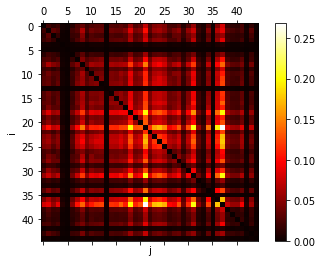

In [2]:

import matplotlib.pyplot as plt
###Model correaltion###
fig = plt.figure()
ax = fig.add_subplot(111)
C= mod_cov.copy()
np.fill_diagonal(C, 0, wrap=False)
tax = ax.matshow(C, cmap='hot', interpolation='nearest')
fig.colorbar(tax)
plt.ylabel("i")
plt.xlabel("j")
plt.show()
    

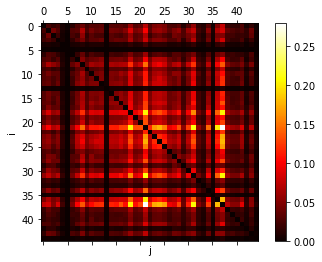

In [3]:
###Emperical correaltion###
fig = plt.figure()
ax = fig.add_subplot(111)
C= emp_cov.copy()
np.fill_diagonal(C, 0, wrap=False)
tax = ax.matshow(C, cmap='hot', interpolation='nearest')
fig.colorbar(tax)
plt.ylabel("i")
plt.xlabel("j")
plt.show()
    

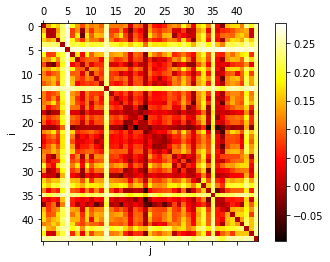

In [4]:
###Coupling constant###
fig = plt.figure()
ax = fig.add_subplot(111)
np.fill_diagonal(J, 0, wrap=False)
tax = ax.matshow(J, cmap='hot', interpolation='nearest')
fig.colorbar(tax)
plt.ylabel("i")
plt.xlabel("j")
plt.show()

<Figure size 432x288 with 0 Axes>

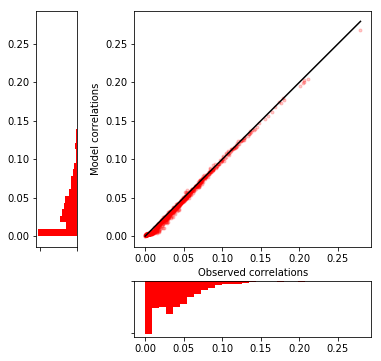

In [5]:
import seaborn as sns

ins = np.tril_indices(n, k=-1)
under_emp = emp_cov[ins]
under_mod = mod_cov[ins]


plt.figure()



x,y = under_emp, under_mod

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.6, wspace=1.4)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
x_hist.hist(x, int(round(np.sqrt(np.size(x)))), histtype='stepfilled',
                orientation='vertical', color='red')
x_hist.invert_yaxis()

y_hist.hist(y, int(round(np.sqrt(np.size(x)))), histtype='stepfilled',
                orientation='horizontal', color='red')
y_hist.invert_xaxis()

main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2,color='red')


minimum = min(min(x),min(y))
maximum = max(max(x),max(y))
main_ax.plot([minimum,maximum],[minimum,maximum],'k-')




main_ax.set_xlabel("Observed correlations")
main_ax.set_ylabel("Model correlations")
plt.show()

<Figure size 432x288 with 0 Axes>

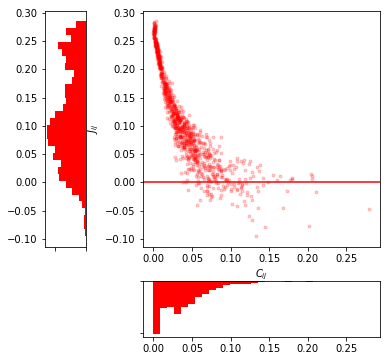

In [6]:
under_J = J[ins]
plt.figure()




x,y = under_emp, under_J

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.6, wspace=1.4)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
x_hist.hist(x, int(round(np.sqrt(np.size(x)))), histtype='stepfilled',
                orientation='vertical', color='red')
x_hist.invert_yaxis()

y_hist.hist(y, int(round(np.sqrt(np.size(x)))), histtype='stepfilled',
                orientation='horizontal', color='red')
y_hist.invert_xaxis()

main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2,color='red')

main_ax.axhline(y=0,c='r')


main_ax.set_xlabel("$C_{ij}$")
main_ax.set_ylabel("$J_{ij}$")
plt.show()

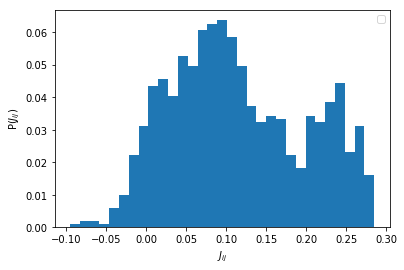

In [7]:
weights = np.ones_like(under_J)/float(len(under_J))
plt.figure()
plt.hist(under_J,bins=int(round(np.sqrt(np.size(under_J)))),weights=weights)
plt.legend(loc='upper right')
plt.ylabel("P($J_{ij}$)")
plt.xlabel("$J_{ij}$")
plt.show()

<Figure size 432x288 with 0 Axes>

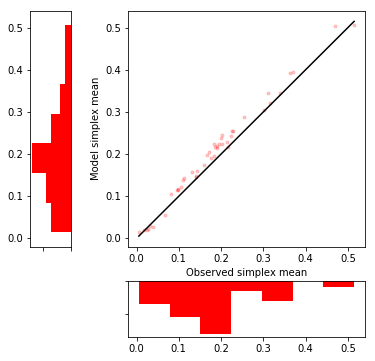

In [8]:
emp_mean = np.diagonal(emp_cov)
mod_mean = np.diagonal(mod_cov)
plt.figure()




x,y = emp_mean, mod_mean

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.6, wspace=1.4)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
x_hist.hist(x, int(round(np.sqrt(np.size(x)))), histtype='stepfilled',
                orientation='vertical', color='red')
x_hist.invert_yaxis()

y_hist.hist(y, int(round(np.sqrt(np.size(x)))), histtype='stepfilled',
                orientation='horizontal', color='red')
y_hist.invert_xaxis()

main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2,color='red')


minimum = min(min(x),min(y))
maximum = max(max(x),max(y))
main_ax.plot([minimum,maximum],[minimum,maximum],'k-')

main_ax.set_xlabel("Observed simplex mean")
main_ax.set_ylabel("Model simplex mean")
plt.show()



<Figure size 432x288 with 0 Axes>

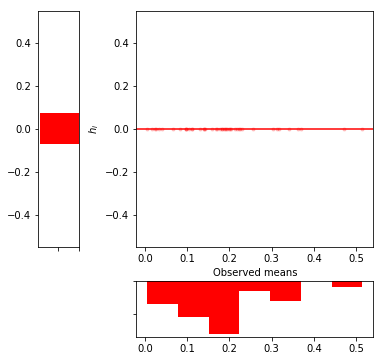

In [9]:
emp_mean = np.diagonal(emp_cov)
h = np.diagonal(J)
plt.figure()





x,y = emp_mean, h

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.6, wspace=1.4)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
x_hist.hist(x, int(round(np.sqrt(np.size(x)))), histtype='stepfilled',
                orientation='vertical', color='red')
x_hist.invert_yaxis()

y_hist.hist(y, int(round(np.sqrt(np.size(x)))), histtype='stepfilled',
                orientation='horizontal', color='red')
y_hist.invert_xaxis()

main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2,color='red')


main_ax.axhline(y=0,c='r')
main_ax.set_xlabel("Observed means")
main_ax.set_ylabel("$h_{i}$")
plt.show()



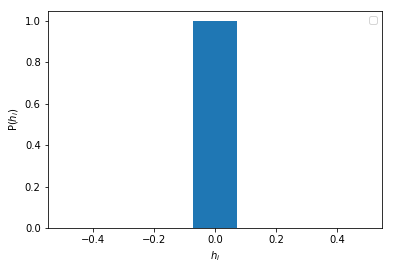

In [10]:
weights = np.ones_like(h)/float(len(h))
plt.figure()
plt.hist(h,bins=int(round(np.sqrt(np.size(h)))),weights=weights)
plt.legend(loc='upper right')
plt.ylabel("P($h_{i}$)")
plt.xlabel("$h_{i}$")
plt.show()

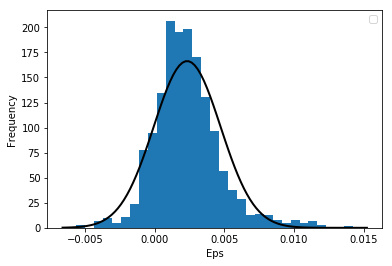

In [11]:
eps = under_emp.flatten() - under_mod.flatten()
from scipy.stats import norm
mu, std = norm.fit(eps)

histogram=plt.figure()
plt.hist(eps,bins=int(round(np.sqrt(np.size(eps)))),density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.legend(loc='upper right')
plt.ylabel("Frequency")
plt.xlabel("Eps")
plt.show()


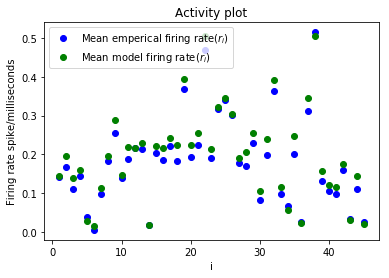

In [12]:
###Plot firing rate
emp_firing_rate = emp_mean.flatten()
model_firing_rate = mod_mean.flatten()
neurons = np.arange(1, np.size(emp_firing_rate)+1)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel("i")
r_e, = plt.plot(neurons, emp_firing_rate, 'bo',label="Mean emperical firing rate"r'($r_{i}$)')
r_m, = plt.plot(neurons, model_firing_rate, 'go',label="Mean model firing rate"r'($r_{i}$)')
plt.legend(handles=[r_e, r_m])
plt.title("Activity plot")
plt.ylabel("Firing rate spike/milliseconds")
plt.show()